# Assignment 2

### Import libraries

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [ ]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [ ]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [ ]:
newcol = np.ones(X.shape[0])
X = np.column_stack((newcol, X))
print('Printing shape of X: ', X.shape)


Printing shape of X:  (70, 2)


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape Y_train:", Y_train.shape)
print("Shape Y_test:", Y_test.shape)

Shape X_train: (56, 2)
Shape X_test: (14, 2)
Shape Y_train: (56,)
Shape Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

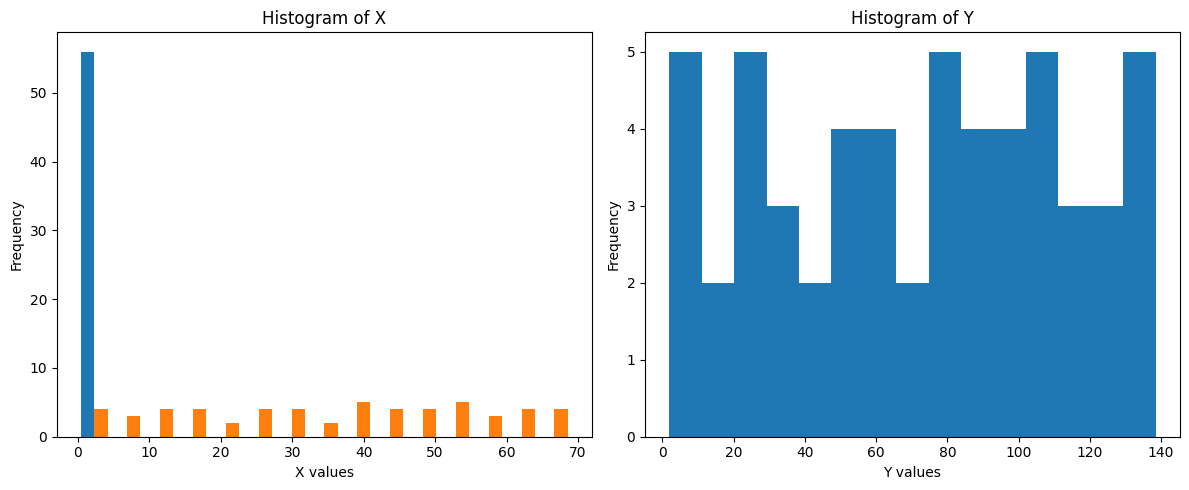

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

axes[0].hist(X_train, bins=15)
axes[0].set_title("Histogram of X")
axes[0].set_xlabel("X values")
axes[0].set_ylabel("Frequency")

axes[1].hist(Y_train, bins=15)
axes[1].set_title("Histogram of Y")
axes[1].set_xlabel("Y values")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [ ]:
M1_weights = np.array([5,1])
M2_weights = np.array([1,2])
M1_hat_train = np.dot(X_train, M1_weights)
M2_hat_train = 1 + np.dot(X_train, M2_weights)
print("Shape of M1_hat_train: ", M1_hat_train.shape)
print("Shape of M2_hat_train: ", M2_hat_train.shape)

Shape of M1_hat_train:  (56,)
Shape of M2_hat_train:  (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch.

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [ ]:
num_epochs = 5
for i in range(num_epochs):
    print(i)

0
1
2
3
4


In [ ]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)
    print("Weights: ", weights)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W.
    predictions = np.dot(inputs, W)

    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.mean(diff ** 2)

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    print("Losses: ", losses)

    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = (2/m) * np.dot(inputs.T, diff)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

  # Append the final weights after the loop
  weights.append(W)

  return np.array(weights), np.array(losses)

In [ ]:
gradient_descent(X_train, Y_train, 0.0002, 5)

Weights:  [array([1., 1.])]
Losses:  [np.float64(1665.3666608648086)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083]), array([1.02055715, 1.96299757])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864), np.float64(2.686212284426659)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083]), array([1.02055715, 1.96299757]), array([1.02110352, 1.98805237])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864), np.float64(2.686212284426659), np.float64(0.5898109426970056)]


(array([[1.        , 1.        ],
        [1.01418788, 1.66525772],
        [1.01895194, 1.88825083],
        [1.02055715, 1.96299757],
        [1.02110352, 1.98805237],
        [1.02129496, 1.99645053]]),
 array([1.66536666e+03, 1.87405140e+02, 2.13444479e+01, 2.68621228e+00,
        5.89810943e-01]))

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

Weights:  [array([1., 1.])]
Losses:  [np.float64(1665.3666608648086)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083]), array([1.02055715, 1.96299757])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864), np.float64(2.686212284426659)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083]), array([1.02055715, 1.96299757]), array([1.02110352, 1.98805237])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864), np.float64(2.686212284426659), np.float64(0.5898109426970056)]
We

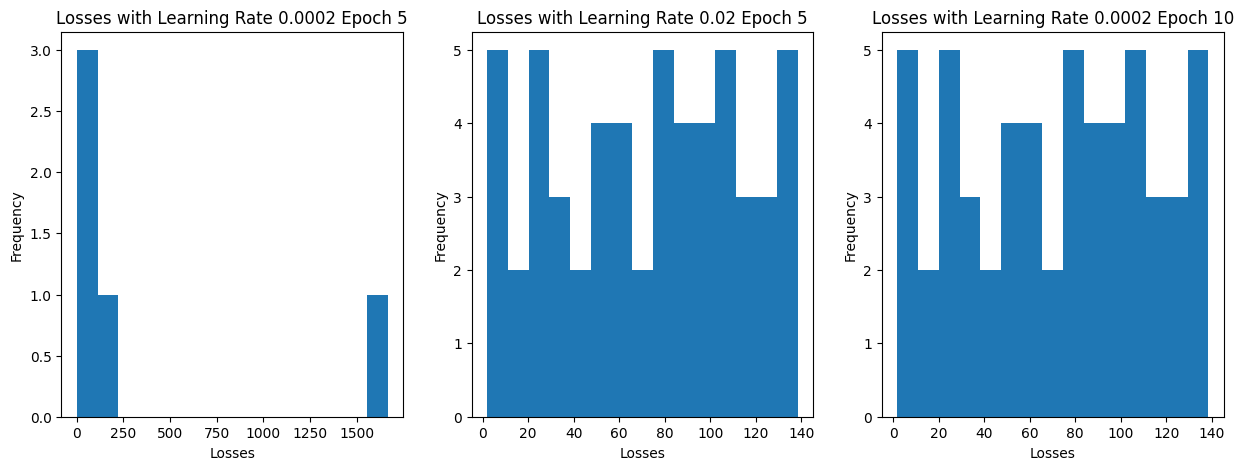

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

L_Rate_one = gradient_descent(X_train, Y_train, 0.0002, 5)[1]
axes[0].hist(L_Rate_one, bins=15)
axes[0].set_title("Losses with Learning Rate 0.0002 Epoch 5")
axes[0].set_xlabel("Losses")
axes[0].set_ylabel("Frequency")

L_Rate_one = gradient_descent(X_train, Y_train, 0.02, 5)[1]
axes[1].hist(Y_train, bins=15)
axes[1].set_title("Losses with Learning Rate 0.02 Epoch 5")
axes[1].set_xlabel("Losses")
axes[1].set_ylabel("Frequency")

epoch_change = gradient_descent(X_train, Y_train, 0.0002, 10)[1]
axes[2].hist(Y_train, bins=15)
axes[2].set_title("Losses with Learning Rate 0.0002 Epoch 10")
axes[2].set_xlabel("Losses")
axes[2].set_ylabel("Frequency")

print("Rather than increasing the learning rate, it is beneficial to increase the epoch.")
print("This is because in the histogram, we see that there is less divergence compared to the one with the same learning rate and 5 epochs.")
print("Compared to the 0.02 learning rate histogram, there are also less losses.")


### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [ ]:
M3_weights, M3_losses = gradient_descent(X_train, Y_train, 0.0002, 10)
M3_final_weights = M3_weights[-1]
print("Final Weights: " , M3_final_weights)
print("M3(x) = np.dot(M3_final_weights, X_train)")

M3_x = np.dot(X_train, M3_final_weights)

Weights:  [array([1., 1.])]
Losses:  [np.float64(1665.3666608648086)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083]), array([1.02055715, 1.96299757])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864), np.float64(2.686212284426659)]
Weights:  [array([1., 1.]), array([1.01418788, 1.66525772]), array([1.01895194, 1.88825083]), array([1.02055715, 1.96299757]), array([1.02110352, 1.98805237])]
Losses:  [np.float64(1665.3666608648086), np.float64(187.40513955606463), np.float64(21.344447859595864), np.float64(2.686212284426659), np.float64(0.5898109426970056)]
We

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [ ]:
MSE_M1 = mean_squared_error(M1_hat_train, Y_train)
MSE_M2 = mean_squared_error(M2_hat_train, Y_train)
MSE_M3 = mean_squared_error(M3_x, Y_train)

print("MSE M1: ", MSE_M1)
print("MSE M2: ", MSE_M2)
print("MSE M3: ", MSE_M3)

print("As seen here, the MSE for M3 is the smallest. Therefore M3 is the best performing model and M1 the worst.")

MSE M1:  1397.608983658733
MSE M2:  1.1743507594839617
MSE M3:  0.32444396071340914
As seen here, the MSE for M3 is the smallest. Therefore M3 is the best performing model and M1 the worst.


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability? Hint: compare training vs. test MSE.

In [ ]:
M1_hat_test = np.dot(X_test, M1_weights)
M2_hat_test = 1 + np.dot(X_test, M2_weights)
M3_x_test = np.dot(X_test, M3_final_weights)

MSE_M1_test = mean_squared_error(M1_hat_test, Y_test)
MSE_M2_test = mean_squared_error(M2_hat_test, Y_test)
MSE_M3_test = mean_squared_error(M3_x_test, Y_test)

print("MSE M1: ", MSE_M1_test)
print("MSE M2: ", MSE_M2_test)
print("MSE M3: ", MSE_M3_test)

print("Model 3 has better generalization ability. This is because both training and test MSE are very small and similar in value as compared to M1 and M2.")

MSE M1:  1113.6003911560044
MSE M2:  1.4062566168172699
MSE M3:  0.29736400999669804
Model 3 has better generalization ability. This is because both training and test MSE are very small and similar in value as compared to M1 and M2.
